In [17]:
import torch
torch.hub._validate_not_a_forked_repo=lambda a,b,c: True
import numpy as np
from sklearn.decomposition import PCA 

In [9]:
roberta = torch.hub.load('pytorch/fairseq', 'roberta.large')

Downloading: "https://github.com/pytorch/fairseq/archive/master.zip" to /home/weicheng/.cache/torch/hub/master.zip


running build_ext
cythoning fairseq/data/data_utils_fast.pyx to fairseq/data/data_utils_fast.cpp
cythoning fairseq/data/token_block_utils_fast.pyx to fairseq/data/token_block_utils_fast.cpp
building 'fairseq.libbleu' extension
creating /home/weicheng/.cache/torch/hub/pytorch_fairseq_master/build
creating /home/weicheng/.cache/torch/hub/pytorch_fairseq_master/build/temp.linux-x86_64-3.8
creating /home/weicheng/.cache/torch/hub/pytorch_fairseq_master/build/temp.linux-x86_64-3.8/fairseq
creating /home/weicheng/.cache/torch/hub/pytorch_fairseq_master/build/temp.linux-x86_64-3.8/fairseq/clib
creating /home/weicheng/.cache/torch/hub/pytorch_fairseq_master/build/temp.linux-x86_64-3.8/fairseq/clib/libbleu
Emitting ninja build file /home/weicheng/.cache/torch/hub/pytorch_fairseq_master/build/temp.linux-x86_64-3.8/build.ninja...
Compiling objects...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
[1/2] c++ -MMD -MF /home/weicheng/

2023-04-30 15:24:19 | INFO | fairseq.file_utils | http://dl.fbaipublicfiles.com/fairseq/models/roberta.large.tar.gz not found in cache, downloading to /tmp/tmpqbj1daii
100%|██████████| 655283069/655283069 [00:05<00:00, 114957858.61B/s]
2023-04-30 15:24:25 | INFO | fairseq.file_utils | copying /tmp/tmpqbj1daii to cache at /home/weicheng/.cache/torch/pytorch_fairseq/83e3a689e28e5e4696ecb0bbb05a77355444a5c8a3437e0f736d8a564e80035e.c687083d14776c1979f3f71654febb42f2bb3d9a94ff7ebdfe1ac6748dba89d2
2023-04-30 15:24:25 | INFO | fairseq.file_utils | creating metadata file for /home/weicheng/.cache/torch/pytorch_fairseq/83e3a689e28e5e4696ecb0bbb05a77355444a5c8a3437e0f736d8a564e80035e.c687083d14776c1979f3f71654febb42f2bb3d9a94ff7ebdfe1ac6748dba89d2
2023-04-30 15:24:25 | INFO | fairseq.file_utils | removing temp file /tmp/tmpqbj1daii
2023-04-30 15:24:25 | INFO | fairseq.file_utils | loading archive file http://dl.fbaipublicfiles.com/fairseq/models/roberta.large.tar.gz from cache at /home/weicheng/

In [37]:
text_male = 'he son his him father man boy himself male brother sons fathers men boys males brothers uncle uncles nephew nephews'
text_female = 'she daughter hers her mother woman girl herself female sister daughters mothers women girls females sisters aunt aunts niece nieces'

In [43]:
text_male = 'he son his him father man boy himself male brother'
text_female = 'she daughter hers her mother woman girl herself female sister'

In [44]:
text_male = text_male.split(' ')
text_female = text_female.split(' ')

new_ls=[ ]
for i in range(len(text_male)):
    new_ls.append(text_male[i] + ' ' + text_female[i])

# print(new_ls)
new_ls = ' '.join(new_ls)
print(new_ls)
# tokens = roberta.encode(text)
# print(roberta.decode(tokens))


he she son daughter his hers him her father mother man woman boy girl himself herself male female brother sister


In [46]:
tokens = roberta.encode(new_ls)
print(roberta.decode(tokens))
last_layer_features = roberta.extract_features(tokens)
print(last_layer_features.shape)

he she son daughter his hers him her father mother man woman boy girl himself herself male female brother sister
torch.Size([1, 22, 1024])


In [47]:
last_layer_features[0:1, 1:-1].shape

torch.Size([1, 20, 1024])

In [48]:
def doPCA(pairs, num_components=10):
    matrix = []
    for i in range(0, len(pairs)-1, 2):
        a = pairs[i]
        b = pairs[i+1]
    # for a, b in pairs:
        center = (a+b)/2
        matrix.append(a-center)
        matrix.append(b-center)
    matrix = np.array(matrix)
    pca = PCA(n_components=num_components)
    pca.fit(matrix)
    return pca

In [51]:
pca = doPCA(last_layer_features[0, 1:-1].detach().numpy(), 2)

In [56]:
pca.components_.shape

(2, 1024)

In [54]:
import matplotlib.pyplot as plt

In [ ]:
## TODO: 
# def ss_calculation(text_words):
    

In [79]:
text_words = 'joy sad pride'
tokens = roberta.encode(text_words)
print(tokens)
# print(roberta.decode(tokens))
print([roberta.decode(t.unsqueeze(0)) for t in tokens])
print(roberta.decode(tokens))
last_layer_features = roberta.extract_features(tokens)

tensor([    0, 20768,  5074,  7040,     2])
['', 'joy', ' sad', ' pride', '']
joy sad pride


In [80]:
last_layer_features.shape

torch.Size([1, 5, 1024])

In [81]:
new_word = last_layer_features[:, 1:-1, :]

In [66]:
x_axis, y_axis = pca.components_

In [71]:
print(x_axis.shape)
print(new_word.shape)

(1024,)
torch.Size([1, 1024])


In [74]:
proj_x = torch.matmul(new_word, torch.tensor(x_axis).unsqueeze(1))/torch.norm(torch.tensor(x_axis))

In [75]:
proj_x

tensor([[10.0542]], grad_fn=<DivBackward0>)

In [76]:
proj_y = torch.matmul(new_word, torch.tensor(y_axis).unsqueeze(1))/torch.norm(torch.tensor(y_axis))

In [77]:
proj_y

tensor([[3.7001]], grad_fn=<DivBackward0>)

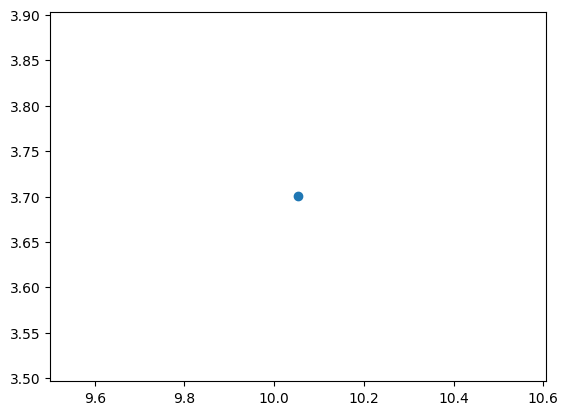

In [78]:
plt.scatter(proj_x.item(), proj_y.item(), )